In [1]:
import librosa
audio_file_path=r"UrbanSound8K/UrbanSound8K/audio_file.wav"
wave_data,wave_sampling_rate=librosa.load(audio_file_path)

In [2]:
wave_sampling_rate

22050

In [3]:
wave_data

array([0.00559841, 0.00670769, 0.00185249, ..., 0.00281176, 0.00390908,
       0.00646727], dtype=float32)

In [4]:
import numpy as np
wave_data_float=wave_data.astype(np.float32)

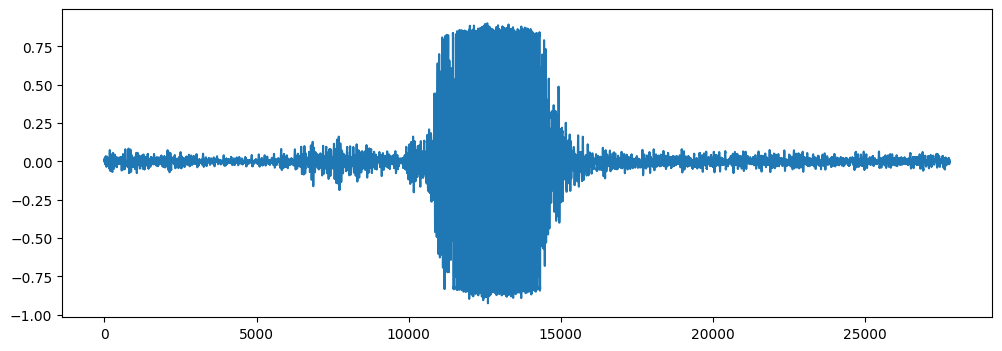

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(wave_data)

In [6]:
from scipy.io import wavfile as wav
wave_sampling_rate_1,wave_data_1=wav.read(audio_file_path)


In [7]:
wave_sampling_rate_1

48000

In [8]:
wave_data_1

array([251, 252, 216, ..., 183, 202, 212], dtype=int16)

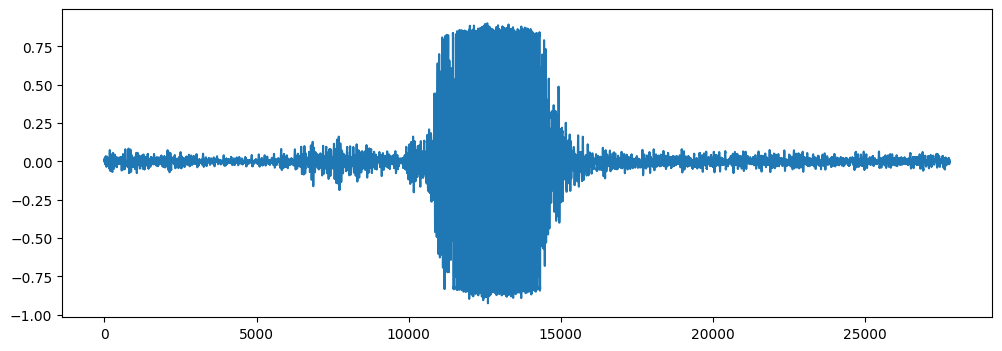

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(wave_data)

In [10]:
mfccs=librosa.feature.mfcc(y=wave_data_float,sr=wave_sampling_rate,n_mfcc=40)
print(mfccs.shape)

(40, 55)


In [11]:
mfccs

array([[-3.26161163e+02, -2.87269470e+02, -2.88447083e+02, ...,
        -2.81561829e+02, -2.96657257e+02, -3.31516693e+02],
       [ 1.21410469e+02,  1.27863358e+02,  1.22758675e+02, ...,
         1.14523148e+02,  1.18969223e+02,  1.13537567e+02],
       [ 2.57392197e+01,  3.24453888e+01,  4.15492859e+01, ...,
         3.07786674e+01,  3.38617935e+01,  3.83849945e+01],
       ...,
       [-3.82446980e+00, -3.90522742e+00, -6.04407310e+00, ...,
         2.25742102e+00,  1.05161023e+00, -5.08559799e+00],
       [ 2.15916872e+00, -1.70459962e+00,  1.71750903e-01, ...,
        -1.92350316e+00, -2.27748871e-01, -3.15721035e+00],
       [-4.08110523e+00, -4.49795818e+00, -2.74705410e+00, ...,
        -8.10234070e+00, -8.60533714e+00, -6.65715885e+00]], dtype=float32)

In [12]:
import pandas as pd
import os
import librosa

audio_dataset_path=r'UrbanSound8K/UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [39]:
!pip install resampy

                                              0.0/3.1 MB ? eta -:--:--
     -                                        0.1/3.1 MB 4.3 MB/s eta 0:00:01
     -----                                    0.4/3.1 MB 5.1 MB/s eta 0:00:01
     -------                                  0.6/3.1 MB 4.8 MB/s eta 0:00:01
     -----------                              0.9/3.1 MB 5.0 MB/s eta 0:00:01
     --------------                           1.1/3.1 MB 5.0 MB/s eta 0:00:01
     -----------------                        1.4/3.1 MB 5.0 MB/s eta 0:00:01
     --------------------                     1.6/3.1 MB 5.1 MB/s eta 0:00:01
     -----------------------                  1.8/3.1 MB 5.3 MB/s eta 0:00:01
     --------------------------               2.0/3.1 MB 5.0 MB/s eta 0:00:01
     ----------------------------             2.2/3.1 MB 4.8 MB/s eta 0:00:01
     -------------------------------          2.4/3.1 MB 5.0 MB/s eta 0:00:01
     ----------------------------------       2.7/3.1 MB 4.8 MB/s eta 0

In [48]:
pip show resampy

Name: resampy
Version: 0.4.2
Summary: Efficient signal resampling
Home-page: https://github.com/bmcfee/resampy
Author: Brian McFee
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: c:\users\aneesh\appdata\local\programs\python\python310\lib\site-packages
Requires: numba, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
from tqdm import tqdm
import resampy

### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])


3555it [04:25, 17.63it/s]C:\Users\Aneesh\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [09:13, 23.91it/s]C:\Users\Aneesh\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Aneesh\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:36, 15.15it/s]


In [15]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [16]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [19]:
y.shape

(8732, 10)

In [20]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [22]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

In [27]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
### No of classes
num_labels=y.shape[1]

In [ ]:
Dense()

In [31]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [33]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 375
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='Saved model files/audio_classification2.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/375
105/110 [===========================>..] - ETA: 0s - loss: 1.0408 - accuracy: 0.7196
Epoch 1: val_loss improved from inf to 1.08763, saving model to Saved model files\audio_classification2.hdf5
110/110 [==============================] - 1s 7ms/step - loss: 1.0377 - accuracy: 0.7201 - val_loss: 1.0876 - val_accuracy: 0.7430
Epoch 2/375
107/110 [============================>.] - ETA: 0s - loss: 1.0067 - accuracy: 0.7145
Epoch 2: val_loss did not improve from 1.08763
110/110 [==============================] - 1s 5ms/step - loss: 1.0017 - accuracy: 0.7154 - val_loss: 1.0961 - val_accuracy: 0.7424
Epoch 3/375
 99/110 [==========================>...] - ETA: 0s - loss: 1.0679 - accuracy: 0.7148
Epoch 3: val_loss improved from 1.08763 to 1.07950, saving model to Saved model files\audio_classification2.hdf5
110/110 [==============================] - 1s 5ms/step - loss: 1.0579 - accuracy: 0.7168 - val_loss: 1.0795 - val_accuracy: 0.7407
Epoch 4/375
108/110 [==========================

Epoch 30/375
110/110 [==============================] - ETA: 0s - loss: 1.0220 - accuracy: 0.7178
Epoch 30: val_loss did not improve from 1.04393
110/110 [==============================] - 1s 6ms/step - loss: 1.0220 - accuracy: 0.7178 - val_loss: 1.0818 - val_accuracy: 0.7487
Epoch 31/375
109/110 [============================>.] - ETA: 0s - loss: 1.0336 - accuracy: 0.7167
Epoch 31: val_loss did not improve from 1.04393
110/110 [==============================] - 1s 6ms/step - loss: 1.0348 - accuracy: 0.7164 - val_loss: 1.0722 - val_accuracy: 0.7567
Epoch 32/375
107/110 [============================>.] - ETA: 0s - loss: 1.0336 - accuracy: 0.7147
Epoch 32: val_loss did not improve from 1.04393
110/110 [==============================] - 1s 5ms/step - loss: 1.0281 - accuracy: 0.7151 - val_loss: 1.0704 - val_accuracy: 0.7550
Epoch 33/375
102/110 [==========================>...] - ETA: 0s - loss: 0.9987 - accuracy: 0.7140
Epoch 33: val_loss did not improve from 1.04393
110/110 [==============

 91/110 [=======================>......] - ETA: 0s - loss: 1.0347 - accuracy: 0.7150
Epoch 59: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0244 - accuracy: 0.7145 - val_loss: 1.0272 - val_accuracy: 0.7430
Epoch 60/375
100/110 [==========================>...] - ETA: 0s - loss: 1.0388 - accuracy: 0.7148
Epoch 60: val_loss did not improve from 1.01560
110/110 [==============================] - 0s 4ms/step - loss: 1.0471 - accuracy: 0.7108 - val_loss: 1.0792 - val_accuracy: 0.7459
Epoch 61/375
103/110 [===========================>..] - ETA: 0s - loss: 1.1205 - accuracy: 0.7159
Epoch 61: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.1160 - accuracy: 0.7142 - val_loss: 1.0658 - val_accuracy: 0.7579
Epoch 62/375
 99/110 [==========================>...] - ETA: 0s - loss: 1.0453 - accuracy: 0.7027
Epoch 62: val_loss did not improve from 1.01560
110/110 [===========================

Epoch 89/375
106/110 [===========================>..] - ETA: 0s - loss: 0.9889 - accuracy: 0.7174
Epoch 89: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 7ms/step - loss: 0.9920 - accuracy: 0.7170 - val_loss: 1.0962 - val_accuracy: 0.7533
Epoch 90/375
 94/110 [========================>.....] - ETA: 0s - loss: 1.0568 - accuracy: 0.7191
Epoch 90: val_loss did not improve from 1.01560
110/110 [==============================] - 0s 4ms/step - loss: 1.0541 - accuracy: 0.7207 - val_loss: 1.0793 - val_accuracy: 0.7607
Epoch 91/375
 98/110 [=========================>....] - ETA: 0s - loss: 1.1064 - accuracy: 0.7173
Epoch 91: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.1207 - accuracy: 0.7154 - val_loss: 1.0838 - val_accuracy: 0.7459
Epoch 92/375
109/110 [============================>.] - ETA: 0s - loss: 1.0920 - accuracy: 0.7063
Epoch 92: val_loss did not improve from 1.01560
110/110 [==============

110/110 [==============================] - 1s 5ms/step - loss: 1.0155 - accuracy: 0.7098 - val_loss: 1.1109 - val_accuracy: 0.7573
Epoch 119/375
101/110 [==========================>...] - ETA: 0s - loss: 1.0771 - accuracy: 0.7095
Epoch 119: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0927 - accuracy: 0.7084 - val_loss: 1.0429 - val_accuracy: 0.7567
Epoch 120/375
109/110 [============================>.] - ETA: 0s - loss: 0.9787 - accuracy: 0.7183
Epoch 120: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 0.9790 - accuracy: 0.7183 - val_loss: 1.1272 - val_accuracy: 0.7476
Epoch 121/375
102/110 [==========================>...] - ETA: 0s - loss: 1.0544 - accuracy: 0.7177
Epoch 121: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0492 - accuracy: 0.7173 - val_loss: 1.1044 - val_accuracy: 0.7521
Epoch 122/375
101/110 [=========

Epoch 148/375
104/110 [===========================>..] - ETA: 0s - loss: 1.0429 - accuracy: 0.7174
Epoch 148: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0353 - accuracy: 0.7164 - val_loss: 1.0781 - val_accuracy: 0.7401
Epoch 149/375
 98/110 [=========================>....] - ETA: 0s - loss: 1.0365 - accuracy: 0.7152
Epoch 149: val_loss did not improve from 1.01560
110/110 [==============================] - 0s 3ms/step - loss: 1.0456 - accuracy: 0.7114 - val_loss: 1.0672 - val_accuracy: 0.7533
Epoch 150/375
108/110 [============================>.] - ETA: 0s - loss: 1.0257 - accuracy: 0.7154
Epoch 150: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0248 - accuracy: 0.7160 - val_loss: 1.1584 - val_accuracy: 0.7447
Epoch 151/375
107/110 [============================>.] - ETA: 0s - loss: 1.0013 - accuracy: 0.7101
Epoch 151: val_loss did not improve from 1.01560
110/110 [======

110/110 [==============================] - 0s 4ms/step - loss: 1.0307 - accuracy: 0.7107 - val_loss: 1.0920 - val_accuracy: 0.7521
Epoch 178/375
109/110 [============================>.] - ETA: 0s - loss: 1.0155 - accuracy: 0.7186
Epoch 178: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0162 - accuracy: 0.7184 - val_loss: 1.1206 - val_accuracy: 0.7539
Epoch 179/375
101/110 [==========================>...] - ETA: 0s - loss: 0.9762 - accuracy: 0.7234
Epoch 179: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 0.9794 - accuracy: 0.7233 - val_loss: 1.1145 - val_accuracy: 0.7396
Epoch 180/375
101/110 [==========================>...] - ETA: 0s - loss: 1.0340 - accuracy: 0.7180
Epoch 180: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0240 - accuracy: 0.7181 - val_loss: 1.1103 - val_accuracy: 0.7544
Epoch 181/375
107/110 [=========

Epoch 207/375
109/110 [============================>.] - ETA: 0s - loss: 1.1093 - accuracy: 0.7165
Epoch 207: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.1079 - accuracy: 0.7168 - val_loss: 1.1283 - val_accuracy: 0.7487
Epoch 208/375
109/110 [============================>.] - ETA: 0s - loss: 1.0028 - accuracy: 0.7198
Epoch 208: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0036 - accuracy: 0.7191 - val_loss: 1.0950 - val_accuracy: 0.7573
Epoch 209/375
110/110 [==============================] - ETA: 0s - loss: 1.0080 - accuracy: 0.7158
Epoch 209: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0080 - accuracy: 0.7158 - val_loss: 1.1414 - val_accuracy: 0.7481
Epoch 210/375
 98/110 [=========================>....] - ETA: 0s - loss: 0.9895 - accuracy: 0.7176
Epoch 210: val_loss did not improve from 1.01560
110/110 [======

110/110 [==============================] - 1s 8ms/step - loss: 1.0643 - accuracy: 0.7185 - val_loss: 1.0658 - val_accuracy: 0.7499
Epoch 237/375
101/110 [==========================>...] - ETA: 0s - loss: 1.0464 - accuracy: 0.7158
Epoch 237: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0575 - accuracy: 0.7140 - val_loss: 1.0814 - val_accuracy: 0.7539
Epoch 238/375
106/110 [===========================>..] - ETA: 0s - loss: 1.0475 - accuracy: 0.7244
Epoch 238: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0510 - accuracy: 0.7221 - val_loss: 1.0378 - val_accuracy: 0.7665
Epoch 239/375
107/110 [============================>.] - ETA: 0s - loss: 1.0171 - accuracy: 0.7125
Epoch 239: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0177 - accuracy: 0.7128 - val_loss: 1.0733 - val_accuracy: 0.7447
Epoch 240/375
101/110 [=========

Epoch 266/375
110/110 [==============================] - ETA: 0s - loss: 1.0625 - accuracy: 0.7181
Epoch 266: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0625 - accuracy: 0.7181 - val_loss: 1.0539 - val_accuracy: 0.7521
Epoch 267/375
106/110 [===========================>..] - ETA: 0s - loss: 1.0238 - accuracy: 0.7114
Epoch 267: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 7ms/step - loss: 1.0362 - accuracy: 0.7095 - val_loss: 1.1214 - val_accuracy: 0.7413
Epoch 268/375
105/110 [===========================>..] - ETA: 0s - loss: 0.9990 - accuracy: 0.7186
Epoch 268: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 8ms/step - loss: 1.0035 - accuracy: 0.7175 - val_loss: 1.1473 - val_accuracy: 0.7293
Epoch 269/375
103/110 [===========================>..] - ETA: 0s - loss: 1.0919 - accuracy: 0.7027
Epoch 269: val_loss did not improve from 1.01560
110/110 [======

110/110 [==============================] - 1s 7ms/step - loss: 1.0208 - accuracy: 0.7167 - val_loss: 1.1207 - val_accuracy: 0.7487
Epoch 296/375
102/110 [==========================>...] - ETA: 0s - loss: 1.0455 - accuracy: 0.7119
Epoch 296: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0362 - accuracy: 0.7140 - val_loss: 1.1152 - val_accuracy: 0.7430
Epoch 297/375
106/110 [===========================>..] - ETA: 0s - loss: 1.1066 - accuracy: 0.7002
Epoch 297: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0989 - accuracy: 0.7005 - val_loss: 1.0443 - val_accuracy: 0.7373
Epoch 298/375
102/110 [==========================>...] - ETA: 0s - loss: 1.0107 - accuracy: 0.7171
Epoch 298: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0268 - accuracy: 0.7167 - val_loss: 1.1103 - val_accuracy: 0.7287
Epoch 299/375
110/110 [=========

Epoch 325/375
105/110 [===========================>..] - ETA: 0s - loss: 1.0345 - accuracy: 0.7121
Epoch 325: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0347 - accuracy: 0.7145 - val_loss: 1.1295 - val_accuracy: 0.7533
Epoch 326/375
103/110 [===========================>..] - ETA: 0s - loss: 1.0123 - accuracy: 0.7174
Epoch 326: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 7ms/step - loss: 1.0140 - accuracy: 0.7184 - val_loss: 1.1675 - val_accuracy: 0.7333
Epoch 327/375
105/110 [===========================>..] - ETA: 0s - loss: 1.0128 - accuracy: 0.7262
Epoch 327: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0068 - accuracy: 0.7253 - val_loss: 1.0961 - val_accuracy: 0.7418
Epoch 328/375
101/110 [==========================>...] - ETA: 0s - loss: 0.9417 - accuracy: 0.7205
Epoch 328: val_loss did not improve from 1.01560
110/110 [======

 98/110 [=========================>....] - ETA: 0s - loss: 1.0690 - accuracy: 0.7116
Epoch 354: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0771 - accuracy: 0.7118 - val_loss: 1.1425 - val_accuracy: 0.7407
Epoch 355/375
104/110 [===========================>..] - ETA: 0s - loss: 1.0251 - accuracy: 0.7141
Epoch 355: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 6ms/step - loss: 1.0337 - accuracy: 0.7132 - val_loss: 1.1372 - val_accuracy: 0.7384
Epoch 356/375
103/110 [===========================>..] - ETA: 0s - loss: 1.0610 - accuracy: 0.7215
Epoch 356: val_loss did not improve from 1.01560
110/110 [==============================] - 1s 5ms/step - loss: 1.0562 - accuracy: 0.7204 - val_loss: 1.1202 - val_accuracy: 0.7602
Epoch 357/375
 97/110 [=========================>....] - ETA: 0s - loss: 1.0411 - accuracy: 0.7179
Epoch 357: val_loss did not improve from 1.01560
110/110 [====================

In [40]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7412707209587097


In [42]:
filename = "UrbanSound8K/UrbanSound8K/dog_bark.wav"
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)
class_probabilities = model.predict(prediction_feature)
predicted_class = np.argmax(class_probabilities)

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 150ms/step
Predicted class: 9


In [43]:
prediction_feature.shape

(1, 40)

In [44]:
X_test[1]

array([-466.17957  ,    1.0950246,  -34.01389  ,   35.33935  ,
        -14.88148  ,  -19.12843  ,   -0.581684 ,  -16.130579 ,
        -21.339075 ,    7.673634 ,  -29.16449  ,  -18.950253 ,
         -2.9579992,   -8.162329 ,  -15.153101 ,   -6.604805 ,
         -7.5685983,    9.340646 ,   14.4331   ,   21.934181 ,
         20.861397 ,    1.3340123,  -19.228804 ,   -4.630231 ,
         -1.0564743,    3.215267 ,   -6.984281 ,  -16.414577 ,
        -10.0286455,   13.009956 ,    0.5334608,  -23.843391 ,
        -15.267321 ,    9.245734 ,   10.367627 ,   -0.5832011,
         -1.2624055,   17.700016 ,   13.847463 ,   -5.1862826],
      dtype=float32)

In [47]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
predicted_classes

55/55 [==============================] - 0s 1ms/step


array([5, 4, 4, ..., 1, 2, 2], dtype=int64)

In [50]:
filename = "UrbanSound8K/UrbanSound8K/dog_bark.wav"

audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)
print(predicted_label)


[-234.667       165.31572     -44.493927    -19.632557    -37.42034
  -27.384491    -17.713993     16.158552    -25.928234      4.182973
    2.575766      5.502858      1.6123058    10.968642      4.634508
   12.642901     11.025836      3.138549      1.1661669     4.394597
    3.4053905    -2.079561      1.621202      8.355597     -4.522607
    0.6237473     4.690442     -1.4363034     0.34019774    2.7678218
   -1.7496414    -5.4708095    -2.487572     -2.0299692    -1.1838927
    3.64202       8.069101     -1.3552366     1.1179284    -1.9288133 ]
[[-234.667       165.31572     -44.493927    -19.632557    -37.42034
   -27.384491    -17.713993     16.158552    -25.928234      4.182973
     2.575766      5.502858      1.6123058    10.968642      4.634508
    12.642901     11.025836      3.138549      1.1661669     4.394597
     3.4053905    -2.079561      1.621202      8.355597     -4.522607
     0.6237473     4.690442     -1.4363034     0.34019774    2.7678218
    -1.7496414    -5.470